In [1]:
from os import getcwd
from pathlib import Path

from flopy_mf6_work.gwf.advtidal import Tidal

In [2]:
ex_sim = Tidal(
    exe_name=Path("C:\\Users\\buckl\\Documents\\Software\\mf6.4.1\\bin\\mf6.exe"),
    sim_ws=Path(getcwd(), "model")
)
ex_sim.simulation

sim_name = gwf_tidal
sim_path = c:\Users\buckl\Documents\Github\flopy_mf6_work\notebooks\testing\gwf_advtidal\model
exe_name = C:\Users\buckl\Documents\Software\mf6.4.1\bin\mf6.exe

###################
Package mfsim.nam
###################

package_name = mfsim.nam
filename = mfsim.nam
package_type = nam
model_or_simulation_package = simulation
simulation_name = gwf_tidal


###################
Package tdis
###################

package_name = tdis
filename = gwf_tidal.tdis
package_type = tdis
model_or_simulation_package = simulation
simulation_name = gwf_tidal


###################
Package ims
###################

package_name = ims
filename = gwf_tidal.ims
package_type = ims
model_or_simulation_package = simulation
simulation_name = gwf_tidal


@@@@@@@@@@@@@@@@@@@@
Model gwf_tidal
@@@@@@@@@@@@@@@@@@@@

name = gwf_tidal
model_type = gwf6
version = mf6
model_relative_path = .

###################
Package dis
###################

package_name = dis
filename = gwf_tidal.dis
package_type = 

In [3]:
ex_sim.model

name = gwf_tidal
model_type = gwf6
version = mf6
model_relative_path = .

###################
Package dis
###################

package_name = dis
filename = gwf_tidal.dis
package_type = dis
model_or_simulation_package = model
model_name = gwf_tidal


###################
Package npf
###################

package_name = npf
filename = gwf_tidal.npf
package_type = npf
model_or_simulation_package = model
model_name = gwf_tidal


###################
Package ic
###################

package_name = ic
filename = gwf_tidal.ic
package_type = ic
model_or_simulation_package = model
model_name = gwf_tidal


###################
Package sto
###################

package_name = sto
filename = gwf_tidal.sto
package_type = sto
model_or_simulation_package = model
model_name = gwf_tidal


###################
Package ghb
###################

package_name = ghb
filename = gwf_tidal.ghb
package_type = ghb
model_or_simulation_package = model
model_name = gwf_tidal


###################
Package obs_0
###########

In [4]:
ex_sim.check_simulation()

Checking model "gwf_tidal"...

gwf_tidal MODEL DATA VALIDATION SUMMARY:
  No errors or warnings encountered.

  Checks that passed:
    npf package: zero or negative horizontal hydraulic conductivity values
    npf package: vertical hydraulic conductivity values below checker threshold of 1e-11
    npf package: vertical hydraulic conductivity values above checker threshold of 100000.0
    npf package: horizontal hydraulic conductivity values below checker threshold of 1e-11
    npf package: horizontal hydraulic conductivity values above checker threshold of 100000.0
    ghb package: BC indices valid
    ghb package: not a number (Nan) entries
    ghb package: BC in inactive cells
    wel package: BC indices valid
    wel package: not a number (Nan) entries
    wel package: BC in inactive cells
    riv package: BC indices valid
    riv package: not a number (Nan) entries
    riv package: BC in inactive cells
    rch-zone_1 package: BC indices valid
    rch-zone_1 package: not a number (

In [5]:
ex_sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims...
  writing model gwf_tidal...
    writing model name file...
    writing package dis...
    writing package npf...
    writing package ic...
    writing package sto...
    writing package ghb...
    writing package obs_0...
    writing package ghb_ts...
    writing package wel...
    writing package wel_ts...
    writing package riv...
    writing package riv_ts...
    writing package rch-zone_1...
    writing package rch_1_ts...
    writing package rch-zone_2...
    writing package rch_2_ts...
    writing package rch-zone_3...
    writing package rch_3_ts...
    writing package evt...
    writing package oc...
    writing package obs...


In [6]:
ex_sim.run_simulation()

FloPy is using the following executable to run the model: ..\..\..\..\..\..\Software\mf6.4.1\bin\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                        VERSION 6.4.1 Release 12/09/2022

   MODFLOW 6 compiled Dec 09 2022 18:18:37 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the US

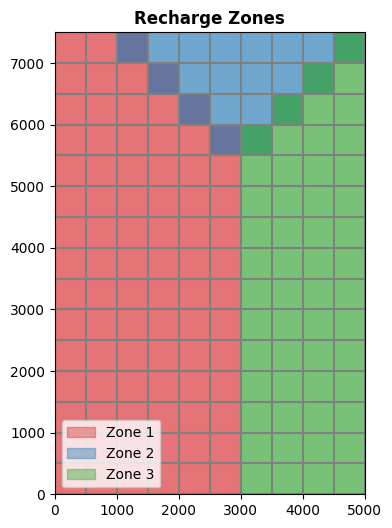

In [7]:
ex_sim.plot_recharge_zones();

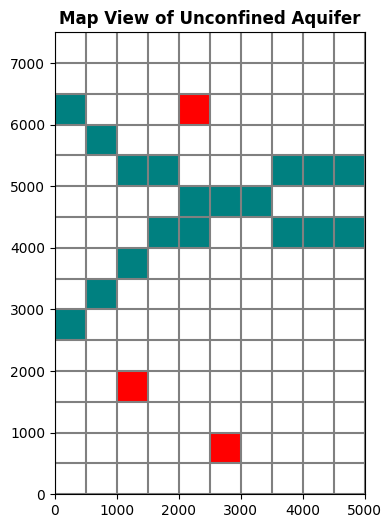

In [8]:
ex_sim.plot_mapview_unconfined_aq();

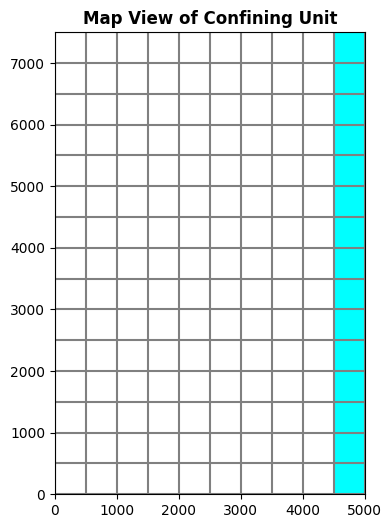

In [9]:
ex_sim.plot_mapview_confining_unit();

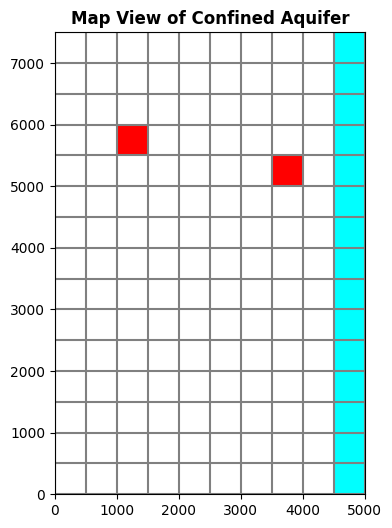

In [10]:
ex_sim.plot_mapview_confined_aq();

In [11]:
ex_sim.simulation.delete_output_files()

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<Axes: xlabel='time', ylabel='H3_13_8'>

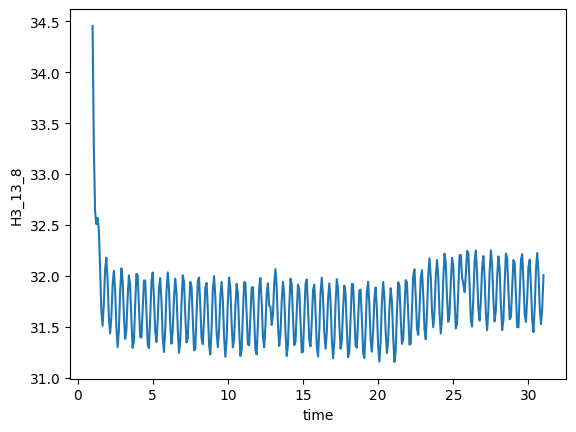

In [25]:
model_obs_head_df = pd.read_csv(
    Path(getcwd(), "model", "gwf_tidal.obs.head.csv")
)

fig, ax = plt.subplots()
sns.lineplot(
    data=model_obs_head_df,
    x="time",
    y="H3_13_8",
    ax=ax
)

<Axes: xlabel='time', ylabel='ICF1'>

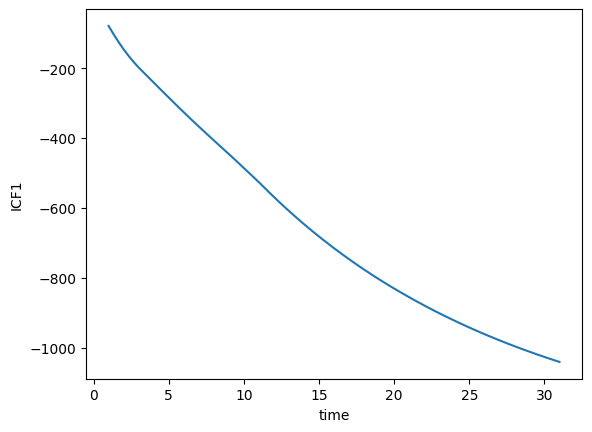

In [27]:
model_obs_flow_df = pd.read_csv(
    Path(getcwd(), "model", "gwf_tidal.obs.flow.csv")
)

fig, ax = plt.subplots()
sns.lineplot(
    data=model_obs_flow_df,
    x="time",
    y="ICF1",
    ax=ax
)

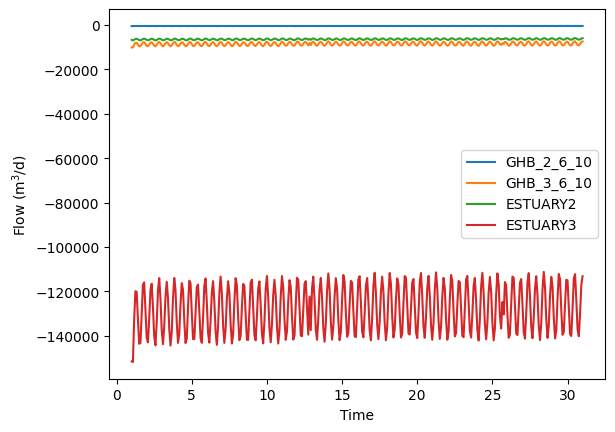

In [37]:
ghb_df = pd.read_csv(
    Path(getcwd(), "model", "gwf_tidal.ghb.obs.csv")
)

fig, ax = plt.subplots()
sns.lineplot(    
    data=ghb_df,
    x="time",
    y="GHB_2_6_10",
    ax=ax,
    label="GHB_2_6_10"
)
sns.lineplot(
    data=ghb_df,
    x="time",
    y="GHB_3_6_10",
    ax=ax,
    label="GHB_3_6_10"
)
sns.lineplot(
    data=ghb_df,
    x="time",
    y="ESTUARY2",
    ax=ax,
    label="ESTUARY2"
)
sns.lineplot(
    data=ghb_df,
    x="time",
    y="ESTUARY3",
    ax=ax,
    label="ESTUARY3"
)
ax.set_xlabel("Time")
ax.set_ylabel("Flow (m$^3$/d)")
plt.legend()

In [30]:
ghb_df.columns

Index(['time', 'GHB_2_6_10', 'GHB_3_6_10', 'ESTUARY2', 'ESTUARY3'], dtype='object')